<font color=black size=6 face=雅黑>Final Project

<font color=black size=4 face=雅黑>I am interested in understanding the effect of economic freedom on the income distribution of different countries in the world. The data API provided by the world bank from the link https://datahelpdesk.worldbank.org/knowledgebase/topics/125589-developer-information. 
The other data soure from https://www.fraserinstitute.org/studies/economic-freedom

In [119]:
# Import the relevant libraries
import requests
import pandas as pd
import json

# Construct the query
base_endpoint = "http://api.worldbank.org/v2/"
method = "/countries" 

# Configuration
params = {
            "format" : "json", # require the response in json format
         }
# request the url and store the response in a variable
response = requests.get(base_endpoint+method,params=params)
# print out the status code attribute of the response object
print(f"status code :{response.status_code}") 
# print out the status code attribute of the response object
print(f"url :{response.url}") 

status code :200
url :http://api.worldbank.org/v2//countries?format=json


In [120]:
# print the first dictionary of the first element of the list. 
# In this particular instance it has the meta data corresponding to the the reponse we received.
print(f"meta data of the response :{response.json()[0]}")

meta data of the response :{'page': 1, 'pages': 7, 'per_page': '50', 'total': 304}


In [121]:
# print the first dictionary of the second element of the list. 
# In this particular instance it has country data for the country Afghanistan
print(f"data retrived for the first element :{response.json()[1][1]}")

data retrived for the first element :{'id': 'AFG', 'iso2Code': 'AF', 'name': 'Afghanistan', 'region': {'id': 'SAS', 'iso2code': '8S', 'value': 'South Asia'}, 'adminregion': {'id': 'SAS', 'iso2code': '8S', 'value': 'South Asia'}, 'incomeLevel': {'id': 'LIC', 'iso2code': 'XM', 'value': 'Low income'}, 'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}, 'capitalCity': 'Kabul', 'longitude': '69.1761', 'latitude': '34.5228'}


In [122]:
# get the iso2code and the name
print(response.json()[1][1]['iso2Code'])
print(response.json()[1][1]['name'])
# get the value of the income level field
print(response.json()[1][1]['incomeLevel']['value'])
print(response.json()[1][1]['longitude'])
print(response.json()[1][1]['latitude'])

AF
Afghanistan
Low income
69.1761
34.5228


In [124]:
# initialize an empty list to store the dictionaries for all the countries
mylist = [] 

# loop through each page upto 7 pages
for page in list(range(1,8)):

    # Construct the query
    base_endpoint = "http://api.worldbank.org/v2/"
    method = "/countries" 

    # Configuration
    params = {
                "format" : "json", # we require the response in json format
                "page" : page, # we need to include the additional parameter
             }
    # request the url and store the response in a variable
    response = requests.get(base_endpoint+method,params=params)
    
    countries = response.json()[1]
    
    # loop through each country
    for country in countries:
        mydict = {} # initialize an empty dictionary to store data for each country
        mydict['iso2code']=country['iso2Code']
        mydict['name']=country['name']
        mydict['incomelevel']=country['incomeLevel']['value']
        mydict['longitude']=country['longitude']
        mydict['latitude']=country['latitude']
        mylist.append(mydict) # append the dictionary to mylist

In [125]:
# convert the list of dictionaries to a pandas dataframe
df = pd.DataFrame(mylist)
display(df.shape)
display(df.head())

(304, 5)

,incomelevel,iso2code,latitude,longitude,name
0,High income,AW,12.5167,-70.0167,Aruba
1,Low income,AF,34.5228,69.1761,Afghanistan
2,Aggregates,A9,,,Africa
3,Lower middle income,AO,-8.81155,13.242,Angola
4,Upper middle income,AL,41.3317,19.8172,Albania


In [126]:
df[df['incomelevel']=='Aggregates'].head(10)

,incomelevel,iso2code,latitude,longitude,name
2,Aggregates,A9,,,Africa
6,Aggregates,L5,,,Andean Region
7,Aggregates,1A,,,Arab World
17,Aggregates,B4,,,East Asia & Pacific (IBRD-only countries)
18,Aggregates,B7,,,Europe & Central Asia (IBRD-only countries)
24,Aggregates,B1,,,IBRD countries classified as high income
28,Aggregates,B2,,,Latin America & the Caribbean (IBRD-only count...
31,Aggregates,B3,,,Middle East & North Africa (IBRD-only countries)
37,Aggregates,B6,,,Sub-Saharan Africa (IBRD-only countries)
40,Aggregates,C9,,,Sub-Saharan Africa (IFC classification)


In [145]:
# drop the rows showing income level as aggregate
df3 = df.drop(df[df['incomelevel']=='Aggregates'].index)
df3.shape

(218, 5)

In [146]:
df1 = pd.read_csv('efw2019.csv')
df1.head()

,Year,ISO_Code,Countries,Economic Freedom Summary Index,Rank,Quartile,Government consumption,data,Transfers and subsidies,data.1,...,Conscription,Labor market regulations,Administrative requirements,Regulatory Burden,Starting a business,Extra payments/bribes/favoritism,Licensing restrictions,Tax compliance,Business regulations,Regulation
0,2008,HKG,Hong Kong,9.11,1.0,1.0,8.21,12.09,9.43,2.58,...,10.0,9.31,6.94,6.90,9.79,8.52,9.79,9.1,8.51,9.27
1,2007,HKG,Hong Kong,9.08,1.0,1.0,8.28,11.86,8.93,4.42,...,10.0,9.19,6.55,6.90,9.63,8.61,8.94,9.1,8.29,9.16
2,1995,HKG,Hong Kong,9.07,1.0,1.0,8.03,12.70,9.84,1.10,...,10.0,8.14,NaN,9.55,9.08,7.27,NaN,NaN,8.63,8.89
3,2006,HKG,Hong Kong,9.05,1.0,1.0,8.10,12.47,8.90,4.53,...,10.0,9.20,6.31,6.90,9.62,8.78,8.35,9.1,8.18,9.13
4,2009,HKG,Hong Kong,9.04,1.0,1.0,8.10,12.45,9.31,3.02,...,10.0,9.46,6.91,6.90,9.79,8.86,9.79,9.1,8.56,9.34


In [147]:
df1.shape

(3455, 73)

In [148]:
df2=df1[df1.Year==2017]
df2.head()

,Year,ISO_Code,Countries,Economic Freedom Summary Index,Rank,Quartile,Government consumption,data,Transfers and subsidies,data.1,...,Conscription,Labor market regulations,Administrative requirements,Regulatory Burden,Starting a business,Extra payments/bribes/favoritism,Licensing restrictions,Tax compliance,Business regulations,Regulation
8,2017,HKG,Hong Kong,8.91,1.0,1.0,7.99,12.82,9.36,2.85,...,10.0,9.37,7.14,9.56,9.94,7.67,9.74,9.61,8.94,9.44
25,2017,SGP,Singapore,8.71,2.0,1.0,4.90,23.35,9.19,3.47,...,0.0,7.67,7.63,10.00,9.95,8.76,9.99,9.28,9.27,8.98
63,2017,NZL,New Zealand,8.50,3.0,1.0,5.05,22.81,6.37,13.82,...,10.0,8.77,5.56,9.78,9.98,8.60,9.40,8.43,8.63,9.13
80,2017,CHE,Switzerland,8.40,4.0,1.0,6.39,18.26,5.98,15.26,...,5.0,7.85,6.21,8.00,9.57,8.05,8.37,9.29,8.25,8.48
125,2017,USA,United States,8.19,5.0,1.0,6.76,17.01,6.03,15.08,...,10.0,9.16,6.42,8.22,9.80,6.49,9.64,8.04,8.10,8.86


In [149]:
df_efw=df2[['Countries','Economic Freedom Summary Index','Rank']]
df_efw.head()

,Countries,Economic Freedom Summary Index,Rank
8,Hong Kong,8.91,1.0
25,Singapore,8.71,2.0
63,New Zealand,8.50,3.0
80,Switzerland,8.40,4.0
125,United States,8.19,5.0


In [150]:
df_country=df3.rename(columns={'name':'Countries'})
df_country.head()

,incomelevel,iso2code,latitude,longitude,Countries
0,High income,AW,12.5167,-70.0167,Aruba
1,Low income,AF,34.5228,69.1761,Afghanistan
3,Lower middle income,AO,-8.81155,13.242,Angola
4,Upper middle income,AL,41.3317,19.8172,Albania
5,High income,AD,42.5075,1.5218,Andorra


In [151]:
df_inner=pd.merge(df_country,df_efw,how='inner')
df_inner.head()

,incomelevel,iso2code,latitude,longitude,Countries,Economic Freedom Summary Index,Rank
0,Lower middle income,AO,-8.81155,13.242,Angola,4.83,158.0
1,Upper middle income,AL,41.3317,19.8172,Albania,7.67,30.0
2,High income,AE,24.4764,54.3705,United Arab Emirates,7.17,61.0
3,Upper middle income,AR,-34.6118,-58.4173,Argentina,5.67,146.0
4,Upper middle income,AM,40.1596,44.509,Armenia,7.70,27.0


In [152]:
df_inner.shape

(144, 7)

In [128]:
# import dependencies
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
df3['incomelevel'].value_counts()

High income            80
Upper middle income    60
Lower middle income    47
Low income             31
Name: incomelevel, dtype: int64

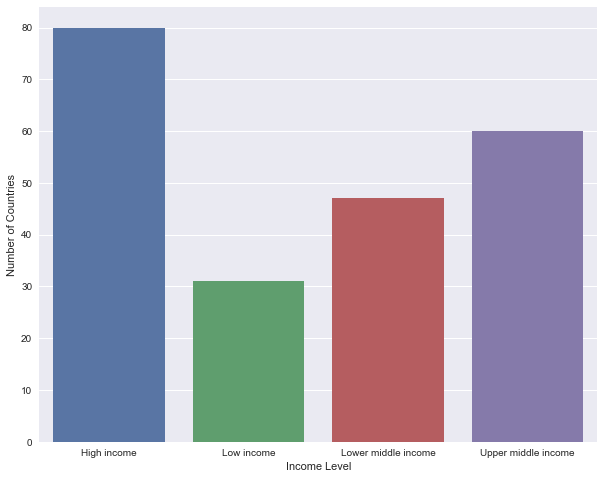

In [132]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
_ = sns.countplot(x="incomelevel", data=df3)
_ = plt.ylabel('Number of Countries')
_ = plt.xlabel('Income Level')
plt.show()

In [116]:
# export the dataframe
df.to_csv("countries.csv", encoding="utf-8", index=False)

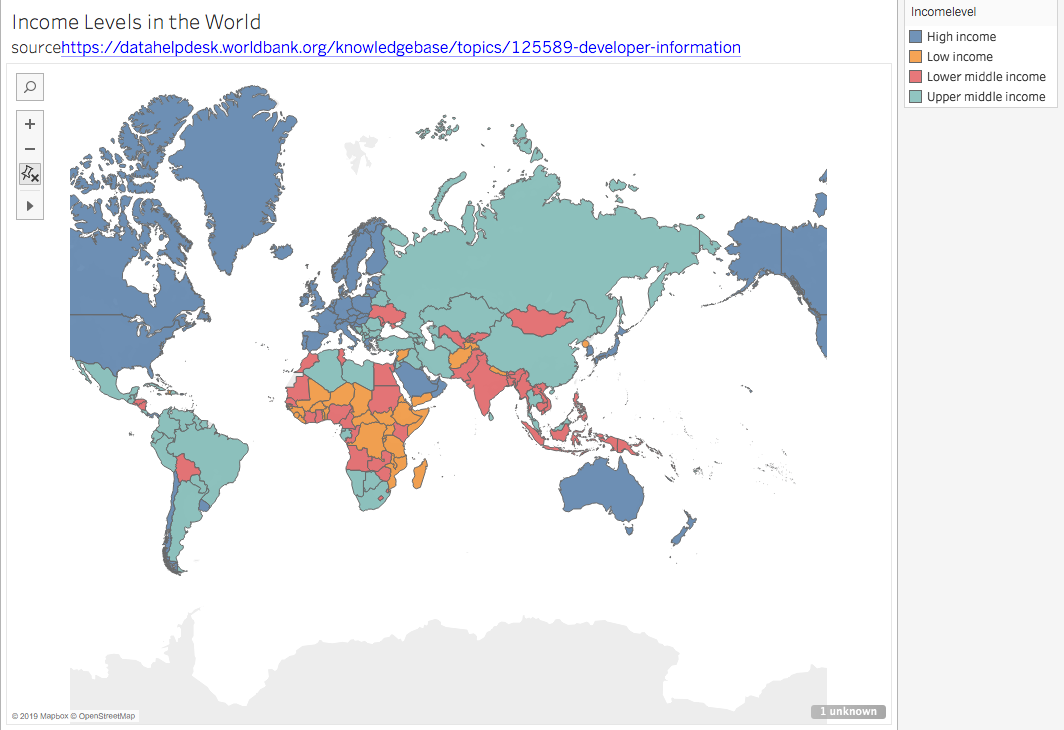

In [153]:
df_inner.groupby('incomelevel')['Economic Freedom Summary Index'].mean()

incomelevel
High income            7.551957
Low income             6.089600
Lower middle income    6.441562
Upper middle income    6.781951
Name: Economic Freedom Summary Index, dtype: float64

In [154]:
df_inner.to_csv("countries_efw.csv", encoding="utf-8", index=False)

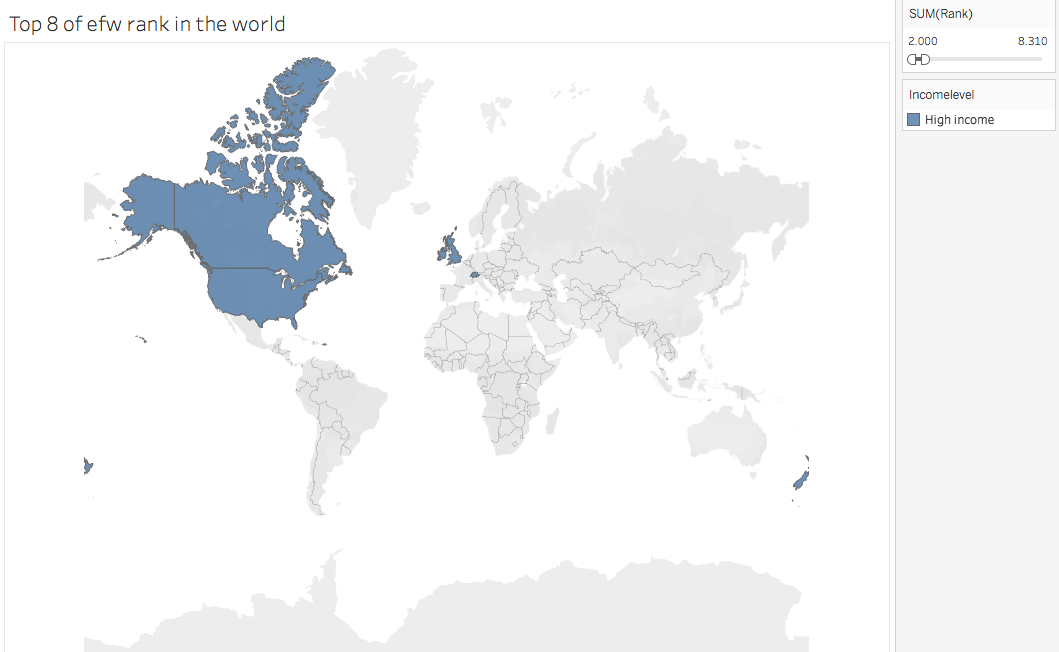

<font color=black size=4 face=雅黑>Insights:  The relationships illustrated in the graphs below reflect the impact of economic freedom as it works through increasing economic income. Countries with greater economic freedom have substantially higher per-capita incomes.

